## **Perhitungan Manual**

---


Import Library

In [169]:
import numpy as np

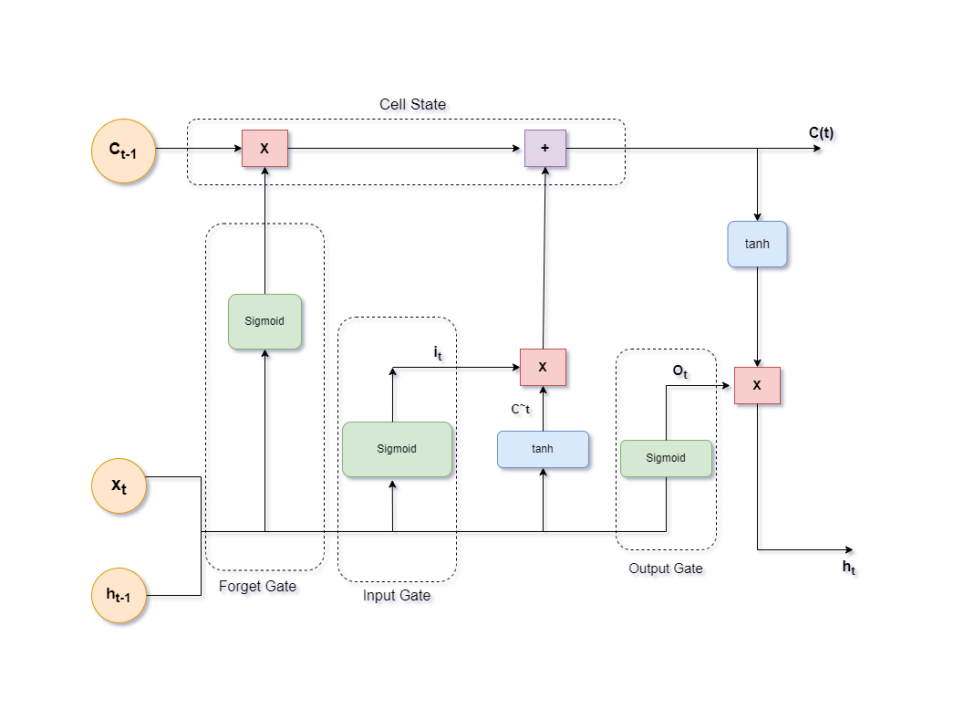

## Input Data

### 1. Input Kata

In [170]:
#Forward Gate
word = 'nikmati' 
x_t = np.array([-1.36, -1.66, 2.38, 6.54, -0.40, -1.5, 5.1, -1.75])

#Backward Gate
word_b = '<pad>' 
x_t_b = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [171]:
print("Input Kata pertama:", word, "(Forward Pass):", x_t)
print("Input Kata terakhir:", word_b, "(Backward Pass):", x_t_b)

Input Kata pertama: nikmati (Forward Pass): [-1.36 -1.66  2.38  6.54 -0.4  -1.5   5.1  -1.75]
Input Kata terakhir: <pad> (Backward Pass): [0. 0. 0. 0. 0. 0. 0. 0.]


### 2. Hidden State Awal

$$ h_{f-1} = \text{Bobot Awal} $$
$$ b_{f-1} = \text{Bias Awal} $$

In [172]:
h_t_minus_1 = np.zeros(4)
c_t_minus_1 = np.zeros(4)

In [173]:
h_t_minus_1
c_t_minus_1

array([0., 0., 0., 0.])

## Bobot dan Bias

### Inisialisasi bobot dan bias menjadi menggunakan Glorot Uniform

**Rumus:**
$$ \text{limit} = \sqrt{\frac{6}{{\text{fan\_in} + \text{fan\_out}}}} $$

**Variabel:**

- $fan_{in}$: jumlah unit di input layer.
- $fan_{out}$: jumlah unit di output layer.

In [174]:
def glorot_uniform(shape, fan_in, fan_out):
    limit = np.sqrt(6 / (fan_in + fan_out))
    return np.random.uniform(-limit, limit, size=shape)

### 1. Forget Gate

- $W_f$: Bobot input untuk forget gate
- $U_f$: Bobot hidden state untuk forget gate
- $b_f$: Bias untuk forget gate

#### Ukuran Matriks

In [175]:
fan_in_W_f = 8
fan_out_W_f = 4

fan_in_U_f = 4
fan_out_U_f = 4

fan_in_W_f_b = 8
fan_out_W_f_b = 4

fan_in_U_f_b = 4
fan_out_U_f_b = 4

#### Fungsi Glorot Uniform

In [176]:
W_f = np.round(glorot_uniform((fan_in_W_f, fan_out_W_f), fan_in_W_f, fan_out_W_f), 1)
U_f = np.round(glorot_uniform((fan_in_U_f, fan_out_U_f), fan_in_U_f, fan_out_U_f), 1)
b_f = np.zeros(1)

W_f_b = np.round(glorot_uniform((fan_in_W_f_b, fan_out_W_f_b), fan_in_W_f_b, fan_out_W_f_b), 1)
U_f_b = np.round(glorot_uniform((fan_in_U_f_b, fan_out_U_f_b), fan_in_U_f_b, fan_out_U_f_b), 1)
b_f_b = np.zeros(1)

In [177]:
print('Forward Pass : \n')
print('Bobot Input : \n' ,W_f)
print('Bobot Hidden : \n', U_f)
print('Bias : \n',b_f)

print('\n')

print('Bobot Backward Pass : \n')
print('Bobot Input : \n' ,W_f_b)
print('Bobot Hidden : \n', U_f_b)
print('Bias : \n',b_f_b)

Forward Pass : 

Bobot Input : 
 [[-0.5 -0.3 -0.4  0.5]
 [-0.6  0.6  0.5 -0.2]
 [-0.6 -0.1 -0.6  0.5]
 [ 0.4 -0.1  0.2 -0.3]
 [-0.1 -0.4  0.4  0.4]
 [-0.2 -0.6 -0.2  0.5]
 [-0.3 -0.5  0.7  0.1]
 [-0.1 -0.3  0.4 -0.6]]
Bobot Hidden : 
 [[-0.1 -0.4 -0.5  0.3]
 [ 0.6  0.3 -0.1 -0.7]
 [-0.7 -0.3  0.4  0.3]
 [ 0.6 -0.3  0.7 -0.1]]
Bias : 
 [0.]


Bobot Backward Pass : 

Bobot Input : 
 [[ 0.2 -0.1 -0.   0.1]
 [-0.6 -0.6 -0.1  0.2]
 [ 0.6 -0.6 -0.4 -0.6]
 [-0.5 -0.6  0.5 -0.6]
 [ 0.2 -0.5  0.7 -0.3]
 [ 0.1 -0.5  0.4  0.1]
 [ 0.  -0.5 -0.2 -0.4]
 [-0.1 -0.3 -0.2  0. ]]
Bobot Hidden : 
 [[ 0.6  0.1  0.8 -0.1]
 [ 0.8 -0.1  0.8  0.8]
 [ 0.8  0.8 -0.3 -0.3]
 [-0.5  0.8 -0.4  0.7]]
Bias : 
 [0.]


### 2. Input Gate

- $W_i$: Bobot input untuk input gate
- $U_i$: Bobot hidden state untuk input gate
- $b_i$: Bias untuk input gate

In [178]:
fan_in_W_i = 8
fan_out_W_i = 4

fan_in_U_i = 4
fan_out_U_i = 4

fan_in_W_i_b = 8
fan_out_W_i_b = 4

fan_in_U_i_b = 4
fan_out_U_i_b = 4

In [179]:
W_i = np.round(glorot_uniform((fan_in_W_i, fan_out_W_i), fan_in_W_i, fan_out_W_i), 1)
U_i = np.round(glorot_uniform((fan_in_U_i, fan_out_U_i), fan_in_U_i, fan_out_U_i), 1)
b_i = np.zeros(1)

W_i_b = np.round(glorot_uniform((fan_in_W_i_b, fan_out_W_i_b), fan_in_W_i_b, fan_out_W_i_b), 1)
U_i_b = np.round(glorot_uniform((fan_in_U_i_b, fan_out_U_i_b), fan_in_U_i_b, fan_out_U_i_b), 1)
b_i_b = np.zeros(1)

In [180]:
print('Forward Pass : \n')

print('Bobot Input : \n' ,W_i)
print('Bobot Hidden : \n', U_i)
print('Bias : \n',b_i)

print('\n')
print('Backward Pass : \n')
print('Bobot Input : \n' ,W_i_b)
print('Bobot Hidden : \n', U_i_b)
print('Bias : \n',b_i_b)


Forward Pass : 

Bobot Input : 
 [[ 0.3 -0.4  0.6 -0.4]
 [ 0.6 -0.4 -0.5 -0.1]
 [ 0.3  0.1 -0.1  0.1]
 [ 0.1 -0.3 -0.6  0.7]
 [-0.2  0.6  0.1  0. ]
 [ 0.6  0.7  0.3 -0.4]
 [ 0.5 -0.2  0.4 -0.4]
 [-0.6 -0.2 -0.2 -0.6]]
Bobot Hidden : 
 [[ 0.4 -0.7  0.4 -0.6]
 [-0.5 -0.3  0.6  0.5]
 [ 0.5 -0.6 -0.5  0.6]
 [ 0.7 -0.4  0.1 -0.8]]
Bias : 
 [0.]


Backward Pass : 

Bobot Input : 
 [[ 0.  -0.3  0.1  0.2]
 [-0.4 -0.2 -0.6  0.2]
 [ 0.6  0.5  0.3 -0.2]
 [-0.4  0.   0.3  0.5]
 [-0.1 -0.   0.3  0.1]
 [-0.5  0.6 -0.3  0.3]
 [-0.1 -0.2 -0.6  0.3]
 [ 0.1  0.2  0.2 -0.4]]
Bobot Hidden : 
 [[-0.7 -0.  -0.7  0.3]
 [ 0.1 -0.   0.1 -0.7]
 [-0.1 -0.2 -0.2  0.4]
 [ 0.7 -0.8 -0.   0.5]]
Bias : 
 [0.]


### 3. Cell State

- $W_c$: Bobot input untuk cell state candidate
- $U_c$: Bobot hidden state untuk cell state candidate
- $b_c$: Bias untuk cell state candidate

In [181]:
fan_in_W_c = 8
fan_out_W_c = 4

fan_in_U_c = 4
fan_out_U_c = 4

fan_in_W_c_b = 8
fan_out_W_c_b = 4

fan_in_U_c_b = 4
fan_out_U_c_b = 4

In [182]:
W_c = np.round(glorot_uniform((fan_in_W_c, fan_out_W_c), fan_in_W_c, fan_out_W_c), 1)
U_c = np.round(glorot_uniform((fan_in_U_c, fan_out_U_c), fan_in_U_c, fan_out_U_c), 1)
b_c = np.zeros(1)

W_c_b = np.round(glorot_uniform((fan_in_W_c_b, fan_out_W_c_b), fan_in_W_c_b, fan_out_W_c_b), 1)
U_c_b = np.round(glorot_uniform((fan_in_U_c_b, fan_out_U_c_b), fan_in_U_c_b, fan_out_U_c_b), 1)
b_c_b = np.zeros(1)

In [183]:
print('Forward Pass : \n')
print('Bobot Input : \n' ,W_c)
print('Bobot Hidden : \n', U_c)
print('Bias : \n',b_c)

print('\n')
print('Backward Pass : \n')
print('Bobot Input : \n' ,W_c_b)
print('Bobot Hidden : \n', U_c_b)
print('Bias : \n',b_c_b)

Forward Pass : 

Bobot Input : 
 [[-0.2  0.7 -0.   0.1]
 [-0.4 -0.3  0.4 -0.1]
 [-0.4  0.3 -0.1  0.6]
 [ 0.7  0.4 -0.1  0.5]
 [-0.6 -0.3  0.1  0.6]
 [-0.2  0.5  0.4 -0.5]
 [-0.1 -0.1  0.1  0. ]
 [ 0.7  0.2 -0.  -0. ]]
Bobot Hidden : 
 [[-0.2  0.5  0.2 -0.5]
 [ 0.   0.6 -0.6  0.5]
 [ 0.8 -0.8  0.7 -0.6]
 [-0.  -0.6  0.8  0.6]]
Bias : 
 [0.]


Backward Pass : 

Bobot Input : 
 [[-0.7 -0.4 -0.1  0.1]
 [ 0.6  0.4 -0.3 -0.5]
 [ 0.3 -0.1  0.3  0.1]
 [ 0.7 -0.1 -0.1  0. ]
 [ 0.2 -0.3  0.4 -0.1]
 [ 0.6 -0.2  0.1  0.6]
 [-0.7  0.6 -0.7  0.6]
 [-0.3  0.7 -0.5 -0.5]]
Bobot Hidden : 
 [[ 0.6 -0.5  0.6  0.4]
 [ 0.8 -0.4 -0.8  0.4]
 [ 0.6  0.2 -0.7 -0.8]
 [-0.2  0.7  0.3 -0.7]]
Bias : 
 [0.]


### 4. Output Gate

- $W_o$: Bobot input untuk output gate
- $U_o$: Bobot hidden state untuk output gate
- $b_o$: Bias untuk output gate

In [184]:
fan_in_W_o = 8
fan_out_W_o = 4

fan_in_U_o = 4
fan_out_U_o = 4

fan_in_W_o_b = 8
fan_out_W_o_b = 4

fan_in_U_o_b = 4
fan_out_U_o_b = 4

In [185]:
W_o = np.round(glorot_uniform((fan_in_W_o, fan_out_W_o), fan_in_W_o, fan_out_W_o), 1)
U_o = np.round(glorot_uniform((fan_in_U_o, fan_out_U_o), fan_in_U_o, fan_out_U_o), 1)
b_o = np.zeros(1)

W_o_b = np.round(glorot_uniform((fan_in_W_o_b, fan_out_W_o_b), fan_in_W_o_b, fan_out_W_o_b), 1)
U_o_b = np.round(glorot_uniform((fan_in_U_o_b, fan_out_U_o_b), fan_in_U_o_b, fan_out_U_o_b), 1)
b_o_b = np.zeros(1)

In [186]:
print('Forward Pass : \n')
print('Bobot Input : \n' ,W_o)
print('Bobot Hidden : \n', U_o)
print('Bias : \n',b_o)

print('\n')
print('Backward Pass : \n')
print('Bobot Input : \n' ,W_o_b)
print('Bobot Hidden : \n', U_o_b)
print('Bias : \n',b_o_b)

Forward Pass : 

Bobot Input : 
 [[ 0.6  0.5 -0.4 -0.1]
 [ 0.6  0.   0.1  0.6]
 [-0.3 -0.6 -0.1 -0.1]
 [-0.2  0.3  0.2  0.3]
 [-0.7  0.2 -0.3  0.5]
 [-0.5 -0.4 -0.7  0.5]
 [-0.2  0.5 -0.5 -0.4]
 [ 0.4  0.6  0.5  0.1]]
Bobot Hidden : 
 [[ 0.5 -0.2  0.6 -0.7]
 [-0.6 -0.4 -0.   0.1]
 [-0.   0.3 -0.5 -0.8]
 [-0.8 -0.5 -0.4  0.5]]
Bias : 
 [0.]


Backward Pass : 

Bobot Input : 
 [[-0.1 -0.2  0.6 -0.3]
 [ 0.3 -0.3  0.4 -0. ]
 [-0.4  0.5 -0.5 -0.4]
 [-0.7 -0.5  0.3 -0.3]
 [-0.6 -0.4 -0.5 -0.5]
 [-0.7  0.5  0.3 -0.6]
 [ 0.6  0.4 -0.5  0.5]
 [-0.4 -0.5  0.1  0.6]]
Bobot Hidden : 
 [[-0.1  0.  -0.4  0.4]
 [-0.2  0.8 -0.7 -0.2]
 [ 0.7 -0.8  0.1 -0.5]
 [-0.   0.1 -0.  -0.2]]
Bias : 
 [0.]


### 5. Klasifikasi
- $W_{\text{clf}}$: Bobot untuk klasifikasi
- $b_{\text{clf}}$: Bias untuk klasifikasi

In [187]:
fan_in_W_clf = 8
fan_out_W_clf = 6

In [188]:
W_clf = np.round(glorot_uniform((fan_in_W_clf, fan_out_W_clf), fan_in_W_clf, fan_out_W_clf), 1)
b_clf = np.zeros(1)

In [189]:
print('Bobot Input : \n' ,W_clf)
print('Bias : \n',b_clf)

Bobot Input : 
 [[ 0.3  0.1 -0.2 -0.3  0.1 -0.5]
 [-0.5 -0.3  0.4 -0.4  0.   0.5]
 [-0.2 -0.6 -0.   0.2 -0.5  0.3]
 [ 0.1 -0.5 -0.5  0.2 -0.   0.7]
 [-0.4 -0.5 -0.1  0.2  0.2  0.2]
 [ 0.4 -0.4  0.2  0.2  0.1 -0.5]
 [ 0.6  0.3 -0.2  0.6 -0.1 -0.2]
 [ 0.3  0.1  0.2 -0.   0.1  0.4]]
Bias : 
 [0.]


## Fungsi Aktivasi

### 1. Sigmoid

**Rumus:**
$$ \text{sigmoid}(x) = \frac{1}{1 + e^{-x}} $$

**Variabel:**

- **$x$**: Nilai input yang akan diubah oleh fungsi sigmoid. Ini bisa berupa output dari layer sebelumnya dalam jaringan neural.
- **$e$**: Bilangan Euler (sekitar 2.71828), yang merupakan basis dari logaritma alami.
- **$\text{sigmoid}(x)$**: Output dari fungsi sigmoid, yang akan berada dalam rentang (0, 1).





In [190]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### 2. Softmax

**Rumus:**
$$ \text{softmax}(x) = \frac{e^{x - \max(x)}}{\sum e^{x - \max(x)}} $$

**Variabel:**
- **$x$**: Vektor input yang berisi nilai mentah (logit) untuk setiap kelas.
- **$x_i$**: Nilai input untuk kelas ke-$i$.
- **$\max(x)$**: Nilai maksimum dalam vektor $x$. Ini sering digunakan untuk stabilitas numerik agar nilai eksponensial tidak menjadi terlalu besar.
- **$e$**: Bilangan Euler (sekitar 2.71828).
- **$\text{softmax}(x_i)$**: Output dari fungsi softmax untuk kelas ke-$i$, yang merupakan probabilitas prediksi untuk kelas tersebut.
- **$\sum_{j}$**: Penjumlahan nilai eksponensial dari semua kelas $j$.




In [191]:
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0)

### 3. ReLU (Rectified Linear Unit)

**Rumus:**
$$ \text{ReLU}(x) = \max(0, x) $$

**Variabel:**
- **$x$**: Nilai input yang diterima oleh fungsi aktivasi.
- **$\max(0, x)$**: Fungsi yang mengambil nilai maksimum antara 0 dan $x$. Jika $x$ positif atau nol, output adalah $x$. Jika $x$ negatif, output adalah 0.
- **$\text{ReLU}(x)$**: Output dari fungsi ReLU, yang merupakan nilai yang sudah melalui proses aktivasi.

In [192]:
def relu(x):
    return np.maximum(0, x)

## Tahapan

### 1. Forget Gate

**Rumus:**
$$ f_t = \sigma(W_f \cdot x_t + U_f \cdot h_{t-1} + b_f) $$

**Variabel:**

- $f_t$: Forget gate activation pada waktu $t$
- $\sigma$: Fungsi sigmoid
- $W_f$: Bobot input untuk forget gate
- $x_t$: Input pada waktu $t$
- $U_f$: Bobot hidden state untuk forget gate
- $h_{t-1}$: Hidden state pada waktu $t-1$
- $b_f$: Bias untuk forget gate



In [193]:
#Forward Pass
def calculate_forget_gate(x_t, h_t_minus_1, W_f, U_f, b_f):
    return sigmoid(np.dot(x_t, W_f) + np.dot(h_t_minus_1, U_f) + b_f)

#Backward Pass
def calculate_forget_gate_b(x_t_b, h_t_minus_1, W_f_b, U_f_b, b_f_b):
    return sigmoid(np.dot(x_t_b, W_f_b) + np.dot(h_t_minus_1, U_f_b) + b_f_b)


In [194]:
f_t = calculate_forget_gate(x_t, h_t_minus_1, W_f, U_f, b_f)
print(f"f_t ({W_f}) x X_t ({x_t}) \n + \n U_f ({U_f}) x h_t-1 ({h_t_minus_1}) \n + \n b_f({b_f})")
print(f"\n Hasil Forget Gate (Forward Pass): {f_t}")

f_t ([[-0.5 -0.3 -0.4  0.5]
 [-0.6  0.6  0.5 -0.2]
 [-0.6 -0.1 -0.6  0.5]
 [ 0.4 -0.1  0.2 -0.3]
 [-0.1 -0.4  0.4  0.4]
 [-0.2 -0.6 -0.2  0.5]
 [-0.3 -0.5  0.7  0.1]
 [-0.1 -0.3  0.4 -0.6]]) x X_t ([-1.36 -1.66  2.38  6.54 -0.4  -1.5   5.1  -1.75]) 
 + 
 U_f ([[-0.1 -0.4 -0.5  0.3]
 [ 0.6  0.3 -0.1 -0.7]
 [-0.7 -0.3  0.4  0.3]
 [ 0.6 -0.3  0.7 -0.1]]) x h_t-1 ([0. 0. 0. 0.]) 
 + 
 b_f([0.])

 Hasil Forget Gate (Forward Pass): [0.86400965 0.07980496 0.93111857 0.38461624]


In [195]:
f_t_b = calculate_forget_gate_b(x_t_b, h_t_minus_1, W_f_b, U_f_b, b_f_b)
print(f"f_t ({W_f_b}) x X_t ({x_t_b}) \n + \n U_f ({U_f_b}) x h_t-1 ({h_t_minus_1}) \n + \n b_f({b_f_b})")
print(f"\n Hasil Forget Gate (Backward Pass): {f_t_b}")

f_t ([[ 0.2 -0.1 -0.   0.1]
 [-0.6 -0.6 -0.1  0.2]
 [ 0.6 -0.6 -0.4 -0.6]
 [-0.5 -0.6  0.5 -0.6]
 [ 0.2 -0.5  0.7 -0.3]
 [ 0.1 -0.5  0.4  0.1]
 [ 0.  -0.5 -0.2 -0.4]
 [-0.1 -0.3 -0.2  0. ]]) x X_t ([0. 0. 0. 0. 0. 0. 0. 0.]) 
 + 
 U_f ([[ 0.6  0.1  0.8 -0.1]
 [ 0.8 -0.1  0.8  0.8]
 [ 0.8  0.8 -0.3 -0.3]
 [-0.5  0.8 -0.4  0.7]]) x h_t-1 ([0. 0. 0. 0.]) 
 + 
 b_f([0.])

 Hasil Forget Gate (Backward Pass): [0.5 0.5 0.5 0.5]


### 2. Input Gate

**Rumus:**
$$ i_t = \sigma(W_i \cdot x_t + U_i \cdot h_{t-1} + b_i) $$

**Variabel:**
- $i_t$: Input gate activation pada waktu $t$
- $\sigma$: Fungsi sigmoid
- $W_i$: Bobot input untuk input gate
- $x_t$: Input pada waktu $t$
- $U_i$: Bobot hidden state untuk input gate
- $h_{t-1}$: Hidden state pada waktu $t-1$
- $b_i$: Bias untuk input gate

In [196]:
#Forward Pass
def calculate_input_gate(x_t, h_t_minus_1, W_i, U_i, b_i):
    return sigmoid(np.dot(x_t, W_i) + np.dot(h_t_minus_1, U_i) + b_i)

#Backward Pass
def calculate_input_gate_b(x_t_b, h_t_minus_1, W_i_b, U_i_b, b_i_b):
    return sigmoid(np.dot(x_t_b, W_i_b) + np.dot(h_t_minus_1, U_i_b) + b_i_b)

In [197]:
i_t = calculate_input_gate(x_t, h_t_minus_1, W_i, U_i, b_i)
print(f"i_t ({W_i}) x X_t ({x_t}) \n + \n U_i ({U_i}) x h_t-1 ({h_t_minus_1}) \n + \n b_i({b_i})")
print(f"\n Hasil Input Gate (Forward Pass): {i_t}")

i_t ([[ 0.3 -0.4  0.6 -0.4]
 [ 0.6 -0.4 -0.5 -0.1]
 [ 0.3  0.1 -0.1  0.1]
 [ 0.1 -0.3 -0.6  0.7]
 [-0.2  0.6  0.1  0. ]
 [ 0.6  0.7  0.3 -0.4]
 [ 0.5 -0.2  0.4 -0.4]
 [-0.6 -0.2 -0.2 -0.6]]) x X_t ([-1.36 -1.66  2.38  6.54 -0.4  -1.5   5.1  -1.75]) 
 + 
 U_i ([[ 0.4 -0.7  0.4 -0.6]
 [-0.5 -0.3  0.6  0.5]
 [ 0.5 -0.6 -0.5  0.6]
 [ 0.7 -0.4  0.1 -0.8]]) x h_t-1 ([0. 0. 0. 0.]) 
 + 
 b_i([0.])

 Hasil Input Gate (Forward Pass): [0.9395736  0.07755789 0.09552212 0.99415322]


In [198]:
i_t_b = calculate_input_gate_b(x_t_b, h_t_minus_1, W_i_b, U_i_b, b_i_b)
print(f"i_t ({W_i_b}) x X_t ({x_t_b}) \n + \n U_i ({U_i_b}) x h_t-1 ({h_t_minus_1}) \n + \n b_i({b_i_b})")
print(f"\n Hasil Input Gate (Backward Pass): {i_t_b}")

i_t ([[ 0.  -0.3  0.1  0.2]
 [-0.4 -0.2 -0.6  0.2]
 [ 0.6  0.5  0.3 -0.2]
 [-0.4  0.   0.3  0.5]
 [-0.1 -0.   0.3  0.1]
 [-0.5  0.6 -0.3  0.3]
 [-0.1 -0.2 -0.6  0.3]
 [ 0.1  0.2  0.2 -0.4]]) x X_t ([0. 0. 0. 0. 0. 0. 0. 0.]) 
 + 
 U_i ([[-0.7 -0.  -0.7  0.3]
 [ 0.1 -0.   0.1 -0.7]
 [-0.1 -0.2 -0.2  0.4]
 [ 0.7 -0.8 -0.   0.5]]) x h_t-1 ([0. 0. 0. 0.]) 
 + 
 b_i([0.])

 Hasil Input Gate (Backward Pass): [0.5 0.5 0.5 0.5]


### 3. Candidate Cell

**Rumus:**
$$ \tilde{c}_t = \tanh(W_c \cdot x_t + U_c \cdot h_{t-1} + b_c) $$

**Variabel:**
- $\tilde{c}_t$: Kandidat cell state pada waktu $t$
- $\tanh$: Fungsi tanh
- $W_c$: Bobot input untuk cell state candidate
- $x_t$: Input pada waktu $t$
- $U_c$: Bobot hidden state untuk cell state candidate
- $h_{t-1}$: Hidden state pada waktu $t-1$
- $b_c$: Bias untuk cell state candidate



In [199]:
#Forward Pass
def calculate_candidate(x_t, h_t_minus_1, W_c, U_c, b_c):
    return np.tanh(np.dot(x_t, W_c) + np.dot(h_t_minus_1, U_c) + b_c)

#Backward Pass
def calculate_candidate_b(x_t_b, h_t_minus_1, W_c_b, U_c_b, b_c_b):
    return np.tanh(np.dot(x_t_b, W_c_b) + np.dot(h_t_minus_1, U_c_b) + b_c_b)

In [200]:
c_tilde_t = calculate_candidate(x_t, h_t_minus_1, W_c, U_c, b_c)
print(f"c_tilde_t ({W_c}) x X_t ({x_t}) \n + \n U_c ({U_c}) x h_t-1 ({h_t_minus_1}) \n + \n b_c({b_c})")
print(f"\n Hasil Candidate (Forward Pass): {c_tilde_t}")

c_tilde_t ([[-0.2  0.7 -0.   0.1]
 [-0.4 -0.3  0.4 -0.1]
 [-0.4  0.3 -0.1  0.6]
 [ 0.7  0.4 -0.1  0.5]
 [-0.6 -0.3  0.1  0.6]
 [-0.2  0.5  0.4 -0.5]
 [-0.1 -0.1  0.1  0. ]
 [ 0.7  0.2 -0.  -0. ]]) x X_t ([-1.36 -1.66  2.38  6.54 -0.4  -1.5   5.1  -1.75]) 
 + 
 U_c ([[-0.2  0.5  0.2 -0.5]
 [ 0.   0.6 -0.6  0.5]
 [ 0.8 -0.8  0.7 -0.6]
 [-0.  -0.6  0.8  0.6]]) x h_t-1 ([0. 0. 0. 0.]) 
 + 
 b_c([0.])

 Hasil Candidate (Forward Pass): [ 0.9976233   0.88228774 -0.93363583  0.99994359]


In [201]:
c_tilde_t_b = calculate_candidate_b(x_t_b, h_t_minus_1, W_c_b, U_c_b, b_c_b)
print(f"c_tilde_t ({W_c_b}) x X_t ({x_t_b}) \n + \n U_c ({U_c_b}) x h_t-1 ({h_t_minus_1}) \n + \n b_c({b_c_b})")
print(f"\n Hasil Candidate (Backward Pass): {c_tilde_t_b}")

c_tilde_t ([[-0.7 -0.4 -0.1  0.1]
 [ 0.6  0.4 -0.3 -0.5]
 [ 0.3 -0.1  0.3  0.1]
 [ 0.7 -0.1 -0.1  0. ]
 [ 0.2 -0.3  0.4 -0.1]
 [ 0.6 -0.2  0.1  0.6]
 [-0.7  0.6 -0.7  0.6]
 [-0.3  0.7 -0.5 -0.5]]) x X_t ([0. 0. 0. 0. 0. 0. 0. 0.]) 
 + 
 U_c ([[ 0.6 -0.5  0.6  0.4]
 [ 0.8 -0.4 -0.8  0.4]
 [ 0.6  0.2 -0.7 -0.8]
 [-0.2  0.7  0.3 -0.7]]) x h_t-1 ([0. 0. 0. 0.]) 
 + 
 b_c([0.])

 Hasil Candidate (Backward Pass): [0. 0. 0. 0.]


### 4. Cell State Update

**Rumus:**
$$ c_t = f_t \cdot c_{t-1} + i_t \cdot \tilde{c}_t $$

**Variabel:**
- $c_t$: Cell state pada waktu $t$
- $f_t$: Forget gate activation pada waktu $t$
- $c_{t-1}$: Cell state pada waktu $t-1$
- $i_t$: Input gate activation pada waktu $t$
- $\tilde{c}_t$: Kandidat cell state pada waktu $t$


In [202]:
#Forward Pass
def calculate_cell_state(f_t, c_t_minus_1, i_t, c_tilde_t):
    return f_t * c_t_minus_1 + i_t * c_tilde_t

#Backward Pass
def calculate_cell_state_b(f_t_b, c_t_minus_1, i_t_b, c_tilde_t_b):
    return f_t_b * c_t_minus_1 + i_t_b * c_tilde_t_b

In [203]:
c_t = calculate_cell_state(f_t, c_t_minus_1, i_t, c_tilde_t)
print(f"f_t ({f_t}) x c_t-1 ({c_t_minus_1}) \n + \n i_t ({i_t}) x c_tilde_t ({c_tilde_t})")
print(f"\n Hasil Cell State (Forward Pass): {c_t}")

f_t ([0.86400965 0.07980496 0.93111857 0.38461624]) x c_t-1 ([0. 0. 0. 0.]) 
 + 
 i_t ([0.9395736  0.07755789 0.09552212 0.99415322]) x c_tilde_t ([ 0.9976233   0.88228774 -0.93363583  0.99994359])

 Hasil Cell State (Forward Pass): [ 0.93734051  0.06842837 -0.08918287  0.99409714]


In [204]:
c_t_b = calculate_cell_state_b(f_t_b, c_t_minus_1, i_t_b, c_tilde_t_b)
print(f"f_t ({f_t_b}) x c_t-1 ({c_t_minus_1}) \n + \n i_t ({i_t_b}) x c_tilde_t ({c_tilde_t_b})")
print(f"\n Hasil Cell State (Backward Pass): {c_t_b}")

f_t ([0.5 0.5 0.5 0.5]) x c_t-1 ([0. 0. 0. 0.]) 
 + 
 i_t ([0.5 0.5 0.5 0.5]) x c_tilde_t ([0. 0. 0. 0.])

 Hasil Cell State (Backward Pass): [0. 0. 0. 0.]


### 5. Output Gate

**Rumus:**
$$ o_t = \sigma(W_o \cdot x_t + U_o \cdot h_{t-1} + b_o) $$

**Variabel:**
- $o_t$: Output gate activation pada waktu $t$
- $\sigma$: Fungsi sigmoid
- $W_o$: Bobot input untuk output gate
- $x_t$: Input pada waktu $t$
- $U_o$: Bobot hidden state untuk output gate
- $h_{t-1}$: Hidden state pada waktu $t-1$
- $b_o$: Bias untuk output gate



In [205]:
#Forward Pass
def calculate_output_gate(x_t, h_t_minus_1, W_o, U_o, b_o):
    return sigmoid(np.dot(x_t, W_o) + np.dot(h_t_minus_1, U_o) + b_o)

#Backward Pass
def calculate_output_gate_b(x_t_b, h_t_minus_1, W_o_b, U_o_b, b_o_b):
    return sigmoid(np.dot(x_t_b, W_o_b) + np.dot(h_t_minus_1, U_o_b) + b_o_b)

In [206]:
o_t = calculate_output_gate(x_t, h_t_minus_1, W_o, U_o, b_o)
print(f"o_t ({W_o}) x X_t ({x_t}) \n + \n U_o ({U_o}) x h_t-1 ({h_t_minus_1}) \n + \n b_o({b_o})")
print(f"\n Hasil Output Gate (Forward Pass): {o_t}")

o_t ([[ 0.6  0.5 -0.4 -0.1]
 [ 0.6  0.   0.1  0.6]
 [-0.3 -0.6 -0.1 -0.1]
 [-0.2  0.3  0.2  0.3]
 [-0.7  0.2 -0.3  0.5]
 [-0.5 -0.4 -0.7  0.5]
 [-0.2  0.5 -0.5 -0.4]
 [ 0.4  0.6  0.5  0.1]]) x X_t ([-1.36 -1.66  2.38  6.54 -0.4  -1.5   5.1  -1.75]) 
 + 
 U_o ([[ 0.5 -0.2  0.6 -0.7]
 [-0.6 -0.4 -0.   0.1]
 [-0.   0.3 -0.5 -0.8]
 [-0.8 -0.5 -0.4  0.5]]) x h_t-1 ([0. 0. 0. 0.]) 
 + 
 b_o([0.])

 Hasil Output Gate (Forward Pass): [0.01072919 0.86692043 0.30853015 0.09104018]


In [207]:
o_t_b = calculate_output_gate_b(x_t_b, h_t_minus_1, W_o_b, U_o_b, b_o_b)
print(f"o_t ({W_o_b}) x X_t ({x_t_b}) \n + \n U_o ({U_o_b}) x h_t-1 ({h_t_minus_1}) \n + \n b_o({b_o_b})")
print(f"\n Hasil Output Gate (Backward Pass): {o_t_b}")

o_t ([[-0.1 -0.2  0.6 -0.3]
 [ 0.3 -0.3  0.4 -0. ]
 [-0.4  0.5 -0.5 -0.4]
 [-0.7 -0.5  0.3 -0.3]
 [-0.6 -0.4 -0.5 -0.5]
 [-0.7  0.5  0.3 -0.6]
 [ 0.6  0.4 -0.5  0.5]
 [-0.4 -0.5  0.1  0.6]]) x X_t ([0. 0. 0. 0. 0. 0. 0. 0.]) 
 + 
 U_o ([[-0.1  0.  -0.4  0.4]
 [-0.2  0.8 -0.7 -0.2]
 [ 0.7 -0.8  0.1 -0.5]
 [-0.   0.1 -0.  -0.2]]) x h_t-1 ([0. 0. 0. 0.]) 
 + 
 b_o([0.])

 Hasil Output Gate (Backward Pass): [0.5 0.5 0.5 0.5]


### 6. Hidden State Update

**Rumus:**
$$ h_t = o_t \cdot \tanh(c_t) $$

**Variabel:**
- $h_t$: Hidden state pada waktu $t$
- $o_t$: Output gate activation pada waktu $t$
- $\tanh$: Fungsi tanh
- $c_t$: Cell state pada waktu $t$


In [208]:
#Forward Pass
def calculate_hidden_state(o_t, c_t):
    return o_t * np.tanh(c_t)

#Backward Pass
def calculate_hidden_state_b(o_t_b, c_t_b):
    return o_t_b * np.tanh(c_t_b)

In [209]:
h_t = calculate_hidden_state(o_t, c_t)
print(f"o_t ({o_t}) x c_t ({c_t})")
print(f"\n Hasil Hidden State (Forward Pass): {h_t}")

o_t ([0.01072919 0.86692043 0.30853015 0.09104018]) x c_t ([ 0.93734051  0.06842837 -0.08918287  0.99409714])

 Hasil Hidden State (Forward Pass): [ 0.0078752   0.05922954 -0.02744289  0.06910896]


In [210]:
h_t_b = calculate_hidden_state_b(o_t_b, c_t_b)
print(f"o_t ({o_t_b}) x c_t ({c_t_b})")
print(f"\n Hasil Hidden State (Backward Pass): {h_t_b}")

o_t ([0.5 0.5 0.5 0.5]) x c_t ([0. 0. 0. 0.])

 Hasil Hidden State (Backward Pass): [0. 0. 0. 0.]


#### Inisialialisasi Akhir

In [211]:
c_prev = c_t
h_prev = h_t

c_prev_b = c_t_b
h_prev_b = h_t_b


print("Forward Pass")
print(f"Final Cell State: {c_prev}")
print(f"Final Hidden State: {h_prev}")

print("\n")
print("Backward Pass")
print(f"Final Cell State: {c_prev_b}")
print(f"Final Hidden State: {h_prev_b}")


Forward Pass
Final Cell State: [ 0.93734051  0.06842837 -0.08918287  0.99409714]
Final Hidden State: [ 0.0078752   0.05922954 -0.02744289  0.06910896]


Backward Pass
Final Cell State: [0. 0. 0. 0.]
Final Hidden State: [0. 0. 0. 0.]


#### Concate

In [212]:
h_bil = np.concatenate((h_prev, h_prev_b))

h_bil

array([ 0.0078752 ,  0.05922954, -0.02744289,  0.06910896,  0.        ,
        0.        ,  0.        ,  0.        ])

### 7. Klasifikasi

**Rumus:**
$$ \text{logits} = \text{ReLU}(W_{\text{clf}} \cdot h_t + b_{\text{clf}}) $$
$$ \text{prediksi} = \text{softmax}(\text{logits}) $$

**Variabel:**
- $\text{logits}$: Nilai logit untuk klasifikasi setelah melalui fungsi aktivasi ReLU
- $W_{\text{clf}}$: Bobot untuk klasifikasi
- $h_t$: Hidden state pada waktu $t$
- $b_{\text{clf}}$: Bias untuk klasifikasi
- $\text{ReLU}$: Fungsi aktivasi Rectified Linear Unit
- $\text{softmax}$: Fungsi softmax untuk mendapatkan probabilitas kelas

In [213]:
def classify(h_bil, W_clf, b_clf):
    logits = relu(np.dot(h_bil, W_clf) + b_clf)
    return softmax(logits)

In [214]:
prediction = classify(h_bil, W_clf, b_clf)
print(f"Relu \n({W_clf} x h_t({h_bil})\n + b_clf({b_clf})")
print(f" \nPrediction scores: {prediction}\n")

Relu 
([[ 0.3  0.1 -0.2 -0.3  0.1 -0.5]
 [-0.5 -0.3  0.4 -0.4  0.   0.5]
 [-0.2 -0.6 -0.   0.2 -0.5  0.3]
 [ 0.1 -0.5 -0.5  0.2 -0.   0.7]
 [-0.4 -0.5 -0.1  0.2  0.2  0.2]
 [ 0.4 -0.4  0.2  0.2  0.1 -0.5]
 [ 0.6  0.3 -0.2  0.6 -0.1 -0.2]
 [ 0.3  0.1  0.2 -0.   0.1  0.4]] x h_t([ 0.0078752   0.05922954 -0.02744289  0.06910896  0.          0.
  0.          0.        ])
 + b_clf([0.])
 
Prediction scores: [0.16440203 0.16440203 0.16440203 0.16440203 0.16680473 0.17558714]



In [215]:
emotion_labels = ['neutral','anger','joy','love','sad','fear']
predicted_emotion = emotion_labels[np.argmax(prediction)]
print(f"Predicted emotion: {predicted_emotion}")


Predicted emotion: fear


# Perhitungan Semua

In [216]:
import numpy as np

# List of words limited to 22
words = ['nikmati', 'senang', 'bareng', 'teman', 'tetap', 'produktif', 'buat', 'bekerja', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']


# Dictionary of embeddings
embeddings = {
    'nikmati': [-1.36, -1.66, 2.38, 6.54, -0.40, -1.5, 5.1, -1.75],
    'senang': [-0.94, -2.41, 0.65, 7.52, 0.85, -1.10, 4.12, -3.24],
    'senang': [-0.94, -2.41, 0.65, 7.52, 0.85, -1.10, 4.12, -3.24],
    'bareng': [-0.46, -0.60, 0.33, 1.45, 0.29, -0.34, 1.48, 0.00],
    'teman': [-1.36, -1.67, 2.39, 6.55, -0.40, -1.51, 5.15, -1.75],
    'tetap': [0.24, -0.20, -0.10, 0.64, 0.51, -0.01, 0.33, 0.05],
    'produktif': [-0.09, -0.74, 0.19, 2.53, 0.94, -0.51, 1.87, 0.14],
    'buat': [0.74, -0.32, 0.11, 1.58, 0.96, 0.08, 0.98, 0.31],
    'bekerja': [3.24, 1.33, -1.96, 6.81, 6.63, 2.82, 4.45, 5.04],
    '<pad>': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
}

# Generate embeddings for the word list
final_embeddings = {word: (embeddings[word] if word in embeddings else np.random.rand(8)) for word in words}

# Print final embeddings
for word, vector in final_embeddings.items():
    print(f"{word}: {vector}")


nikmati: [-1.36, -1.66, 2.38, 6.54, -0.4, -1.5, 5.1, -1.75]
senang: [-0.94, -2.41, 0.65, 7.52, 0.85, -1.1, 4.12, -3.24]
bareng: [-0.46, -0.6, 0.33, 1.45, 0.29, -0.34, 1.48, 0.0]
teman: [-1.36, -1.67, 2.39, 6.55, -0.4, -1.51, 5.15, -1.75]
tetap: [0.24, -0.2, -0.1, 0.64, 0.51, -0.01, 0.33, 0.05]
produktif: [-0.09, -0.74, 0.19, 2.53, 0.94, -0.51, 1.87, 0.14]
buat: [0.74, -0.32, 0.11, 1.58, 0.96, 0.08, 0.98, 0.31]
bekerja: [3.24, 1.33, -1.96, 6.81, 6.63, 2.82, 4.45, 5.04]
<pad>: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [217]:
print(embeddings)

{'nikmati': [-1.36, -1.66, 2.38, 6.54, -0.4, -1.5, 5.1, -1.75], 'senang': [-0.94, -2.41, 0.65, 7.52, 0.85, -1.1, 4.12, -3.24], 'bareng': [-0.46, -0.6, 0.33, 1.45, 0.29, -0.34, 1.48, 0.0], 'teman': [-1.36, -1.67, 2.39, 6.55, -0.4, -1.51, 5.15, -1.75], 'tetap': [0.24, -0.2, -0.1, 0.64, 0.51, -0.01, 0.33, 0.05], 'produktif': [-0.09, -0.74, 0.19, 2.53, 0.94, -0.51, 1.87, 0.14], 'buat': [0.74, -0.32, 0.11, 1.58, 0.96, 0.08, 0.98, 0.31], 'bekerja': [3.24, 1.33, -1.96, 6.81, 6.63, 2.82, 4.45, 5.04], '<pad>': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


In [218]:
x_t = np.array([embeddings[word] for word in words])
print(x_t)

[[-1.36 -1.66  2.38  6.54 -0.4  -1.5   5.1  -1.75]
 [-0.94 -2.41  0.65  7.52  0.85 -1.1   4.12 -3.24]
 [-0.46 -0.6   0.33  1.45  0.29 -0.34  1.48  0.  ]
 [-1.36 -1.67  2.39  6.55 -0.4  -1.51  5.15 -1.75]
 [ 0.24 -0.2  -0.1   0.64  0.51 -0.01  0.33  0.05]
 [-0.09 -0.74  0.19  2.53  0.94 -0.51  1.87  0.14]
 [ 0.74 -0.32  0.11  1.58  0.96  0.08  0.98  0.31]
 [ 3.24  1.33 -1.96  6.81  6.63  2.82  4.45  5.04]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.  

## Forward LSTM process

In [219]:
h_forward = []
c_forward = []

for t in range(len(words)):
    word = words[t]

    #Forget Gate
    f_t = calculate_forget_gate(x_t[t], h_t, W_f, U_f, b_f)
    print(f"f_t {W_f} x {x_t[t]} \n + {h_t} x {U_f} \n + {b_f} \n")
    print(f"Forget Gate (kata '{word}' ke- {t+1}): {f_t}")

    # Input Gate
    i_t = calculate_input_gate(x_t[t], h_t, W_i, U_i, b_i)
    print(f"i_t {W_i} x {x_t[t]} \n + {h_t} x {U_i} \n + {b_i} \n")
    print(f"Input Gate (kata '{word}' ke- {t+1}): {i_t}")

    # Cell State Candidate
    c_tilde_t = calculate_candidate(x_t[t], h_t, W_c, U_c, b_c)
    print(f"c_tilde_t {W_c} x {x_t[t]} \n + {h_t} x {U_c} \n + {b_c} \n")
    print(f"Cell State Candidate (kata '{word}' ke- {t+1}): {c_tilde_t}")

    # Cell State
    c_t = calculate_cell_state(f_t, c_t, i_t, c_tilde_t)
    print(f"f_t {f_t} x {c_t} + i_t {i_t} x {c_tilde_t} \n")
    print(f"Cell State (kata '{word}' ke- {t+1}): {c_t}")

    # Output Gate
    o_t = calculate_output_gate(x_t[t], h_t, W_o, U_o, b_o)
    print(f"o_t {W_o} x {x_t[t]} \n + {h_t} x {U_o} \n + {b_o} \n")
    print(f"Output Gate (kata '{word}' ke- {t+1}): {o_t}")

    # Hidden State
    h_t = calculate_hidden_state(o_t, c_t)
    print(f"o_t {o_t} x tanh({c_t}) \n")
    print(f"Hidden State (kata '{word}' ke- {t+1}): {h_t} \n")

    h_forward.append(h_t)
    c_forward.append(c_t)

f_t [[-0.5 -0.3 -0.4  0.5]
 [-0.6  0.6  0.5 -0.2]
 [-0.6 -0.1 -0.6  0.5]
 [ 0.4 -0.1  0.2 -0.3]
 [-0.1 -0.4  0.4  0.4]
 [-0.2 -0.6 -0.2  0.5]
 [-0.3 -0.5  0.7  0.1]
 [-0.1 -0.3  0.4 -0.6]] x [-1.36 -1.66  2.38  6.54 -0.4  -1.5   5.1  -1.75] 
 + [ 0.0078752   0.05922954 -0.02744289  0.06910896] x [[-0.1 -0.4 -0.5  0.3]
 [ 0.6  0.3 -0.1 -0.7]
 [-0.7 -0.3  0.4  0.3]
 [ 0.6 -0.3  0.7 -0.1]] 
 + [0.] 

Forget Gate (kata 'nikmati' ke- 1): [0.87483754 0.07996071 0.93286397 0.37186088]
i_t [[ 0.3 -0.4  0.6 -0.4]
 [ 0.6 -0.4 -0.5 -0.1]
 [ 0.3  0.1 -0.1  0.1]
 [ 0.1 -0.3 -0.6  0.7]
 [-0.2  0.6  0.1  0. ]
 [ 0.6  0.7  0.3 -0.4]
 [ 0.5 -0.2  0.4 -0.4]
 [-0.6 -0.2 -0.2 -0.6]] x [-1.36 -1.66  2.38  6.54 -0.4  -1.5   5.1  -1.75] 
 + [ 0.0078752   0.05922954 -0.02744289  0.06910896] x [[ 0.4 -0.7  0.4 -0.6]
 [-0.5 -0.3  0.6  0.5]
 [ 0.5 -0.6 -0.5  0.6]
 [ 0.7 -0.4  0.1 -0.8]] 
 + [0.] 

Input Gate (kata 'nikmati' ke- 1): [0.94003692 0.07512819 0.10077166 0.99387442]
c_tilde_t [[-0.2  0.7 -0.   0.1]
 [

i_t [[ 0.3 -0.4  0.6 -0.4]
 [ 0.6 -0.4 -0.5 -0.1]
 [ 0.3  0.1 -0.1  0.1]
 [ 0.1 -0.3 -0.6  0.7]
 [-0.2  0.6  0.1  0. ]
 [ 0.6  0.7  0.3 -0.4]
 [ 0.5 -0.2  0.4 -0.4]
 [-0.6 -0.2 -0.2 -0.6]] x [0. 0. 0. 0. 0. 0. 0. 0.] 
 + [ 0.06906299 -0.00152501  0.07317947 -0.00708674] x [[ 0.4 -0.7  0.4 -0.6]
 [-0.5 -0.3  0.6  0.5]
 [ 0.5 -0.6 -0.5  0.6]
 [ 0.7 -0.4  0.1 -0.8]] 
 + [0.] 

Input Gate (kata '<pad>' ke- 13): [0.51499968 0.47777476 0.49735297 0.50184418]
c_tilde_t [[-0.2  0.7 -0.   0.1]
 [-0.4 -0.3  0.4 -0.1]
 [-0.4  0.3 -0.1  0.6]
 [ 0.7  0.4 -0.1  0.5]
 [-0.6 -0.3  0.1  0.6]
 [-0.2  0.5  0.4 -0.5]
 [-0.1 -0.1  0.1  0. ]
 [ 0.7  0.2 -0.  -0. ]] x [0. 0. 0. 0. 0. 0. 0. 0.] 
 + [ 0.06906299 -0.00152501  0.07317947 -0.00708674] x [[-0.2  0.5  0.2 -0.5]
 [ 0.   0.6 -0.6  0.5]
 [ 0.8 -0.8  0.7 -0.6]
 [-0.  -0.6  0.8  0.6]] 
 + [0.] 

Cell State Candidate (kata '<pad>' ke- 13): [ 0.04470116 -0.0206721   0.06021092 -0.08326052]
f_t [0.48418054 0.48802466 0.49748304 0.5111104 ] x [ 0.08941342 -

## Backward LSTM process

In [220]:
h_backward = []
c_backward = []

for t in reversed(range(len(words))):
    word = words[t]

    # Forget Gate
    f_t_b = calculate_forget_gate(x_t[t], h_t_b, W_f_b, U_f_b, b_f_b)
    print(f"f_t_b {W_f_b} x {x_t[t]} \n + {h_t_b} x {U_f_b} \n + {b_f_b} \n")
    print(f"Forget Gate (backward) (kata '{word}' ke- {t+1}): {f_t_b}")

    # Input Gate
    i_t_b = calculate_input_gate(x_t[t], h_t_b, W_i_b, U_i_b, b_i_b)
    print(f"i_t_b {W_i_b} x {x_t[t]} \n + {h_t_b} x {U_i_b} \n + {b_i_b} \n")
    print(f"Input Gate (backward) (kata '{word}' ke- {t+1}): {i_t_b}")

    # Cell State Candidate
    c_tilde_t_b = calculate_candidate(x_t[t], h_t_b, W_c_b, U_c_b, b_c_b)
    print(f"c_tilde_t_b {W_c_b} x {x_t[t]} \n + {h_t_b} x {U_c_b} \n + {b_c_b} \n")
    print(f"Cell State Candidate (backward) (kata '{word}' ke- {t+1}): {c_tilde_t_b}")

    # Cell State
    c_t_b = calculate_cell_state(f_t_b, c_t_b, i_t_b, c_tilde_t_b)
    print(f"f_t_b {f_t_b} x {c_t_b} + i_t_b {i_t_b} x {c_tilde_t_b} \n")
    print(f"Cell State (backward) (kata '{word}' ke- {t+1}): {c_t_b}")

    # Output Gate
    o_t_b = calculate_output_gate(x_t[t], h_t_b, W_o_b, U_o_b, b_o_b)
    print(f"o_t_b {W_o_b} x {x_t[t]} \n + {h_t_b} x {U_o_b} \n + {b_o_b} \n")
    print(f"Output Gate (backward) (kata '{word}' ke- {t+1}): {o_t_b}")

    # Hidden State
    h_t_b = calculate_hidden_state(o_t_b, c_t_b)
    print(f"o_t_b {o_t_b} x tanh({c_t_b}) \n")
    print(f"Hidden State (backward) (kata '{word}' ke- {t+1}): {h_t_b} \n")

    h_backward.insert(0, h_t_b)
    c_backward.insert(0, c_t_b)

f_t_b [[ 0.2 -0.1 -0.   0.1]
 [-0.6 -0.6 -0.1  0.2]
 [ 0.6 -0.6 -0.4 -0.6]
 [-0.5 -0.6  0.5 -0.6]
 [ 0.2 -0.5  0.7 -0.3]
 [ 0.1 -0.5  0.4  0.1]
 [ 0.  -0.5 -0.2 -0.4]
 [-0.1 -0.3 -0.2  0. ]] x [0. 0. 0. 0. 0. 0. 0. 0.] 
 + [0. 0. 0. 0.] x [[ 0.6  0.1  0.8 -0.1]
 [ 0.8 -0.1  0.8  0.8]
 [ 0.8  0.8 -0.3 -0.3]
 [-0.5  0.8 -0.4  0.7]] 
 + [0.] 

Forget Gate (backward) (kata '<pad>' ke- 64): [0.5 0.5 0.5 0.5]
i_t_b [[ 0.  -0.3  0.1  0.2]
 [-0.4 -0.2 -0.6  0.2]
 [ 0.6  0.5  0.3 -0.2]
 [-0.4  0.   0.3  0.5]
 [-0.1 -0.   0.3  0.1]
 [-0.5  0.6 -0.3  0.3]
 [-0.1 -0.2 -0.6  0.3]
 [ 0.1  0.2  0.2 -0.4]] x [0. 0. 0. 0. 0. 0. 0. 0.] 
 + [0. 0. 0. 0.] x [[-0.7 -0.  -0.7  0.3]
 [ 0.1 -0.   0.1 -0.7]
 [-0.1 -0.2 -0.2  0.4]
 [ 0.7 -0.8 -0.   0.5]] 
 + [0.] 

Input Gate (backward) (kata '<pad>' ke- 64): [0.5 0.5 0.5 0.5]
c_tilde_t_b [[-0.7 -0.4 -0.1  0.1]
 [ 0.6  0.4 -0.3 -0.5]
 [ 0.3 -0.1  0.3  0.1]
 [ 0.7 -0.1 -0.1  0. ]
 [ 0.2 -0.3  0.4 -0.1]
 [ 0.6 -0.2  0.1  0.6]
 [-0.7  0.6 -0.7  0.6]
 [-0.3  0.7 -0

In [221]:
h_bilstm = [np.concatenate([h_f, h_b]) for h_f, h_b in zip(h_forward, h_backward)]
print("BiLSTM hidden states:")
for t, h in enumerate(h_bilstm):
    print(f"\n Time step {t+1}: {h}")

BiLSTM hidden states:

 Time step 1: [ 0.00927652  0.06180283 -0.05377842  0.08408956  0.10446162  0.24249345
 -0.02383841  0.39997674]

 Time step 2: [ 0.00251235  0.16918897 -0.04855387  0.22202119  0.01612582 -0.09232352
 -0.0461727   0.09996664]

 Time step 3: [ 0.15998375  0.07054623 -0.1558598   0.35224859  0.06813157  0.19033985
 -0.14493137  0.32675695]

 Time step 4: [ 0.00824858  0.05411474 -0.13439688  0.09505666  0.08224159  0.25854987
 -0.0177455   0.41084585]

 Time step 5: [ 0.34038972  0.12440426 -0.14383653  0.46268273 -0.03909723  0.03795227
 -0.24084332  0.15950241]

 Time step 6: [ 0.1086851   0.14431503 -0.16468994  0.37887461 -0.02598562  0.06907174
 -0.16323844  0.31607702]

 Time step 7: [ 0.20175619  0.25335301 -0.08606583  0.50357745 -0.01877901 -0.00956971
 -0.24871604  0.22739564]

 Time step 8: [ 2.65172209e-02  3.84965690e-01  7.82616725e-03  4.27793607e-01
  1.27365296e-07  2.25167127e-04 -4.30289125e-01  6.15018354e-02]

 Time step 9: [0.2274252  0.07761

## Klasifikasi

In [222]:
h_t = h_bilstm[-1]

h_t

array([-9.06730779e-08,  2.34278638e-07, -2.49789634e-07,  4.85458477e-08,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [223]:
prediction = classify(h_t, W_clf, b_clf)
print(f"Relu (W_clf {W_clf} x h_t{h_bil} + B_clf{b_clf}")
print(f"Prediction scores: {prediction}\n")

Relu (W_clf [[ 0.3  0.1 -0.2 -0.3  0.1 -0.5]
 [-0.5 -0.3  0.4 -0.4  0.   0.5]
 [-0.2 -0.6 -0.   0.2 -0.5  0.3]
 [ 0.1 -0.5 -0.5  0.2 -0.   0.7]
 [-0.4 -0.5 -0.1  0.2  0.2  0.2]
 [ 0.4 -0.4  0.2  0.2  0.1 -0.5]
 [ 0.6  0.3 -0.2  0.6 -0.1 -0.2]
 [ 0.3  0.1  0.2 -0.   0.1  0.4]] x h_t[ 0.0078752   0.05922954 -0.02744289  0.06910896  0.          0.
  0.          0.        ] + B_clf[0.]
Prediction scores: [0.16666666 0.16666666 0.16666667 0.16666666 0.16666668 0.16666668]



In [224]:
prediction = classify(h_t, W_clf, b_clf)
emotion_labels = ['neutral','anger','joy','love','sad','fear']
predicted_emotion = emotion_labels[np.argmax(prediction)]
print(f"Predicted emotion: {predicted_emotion}")
print(f"Prediction scores: {prediction}\n")

Predicted emotion: fear
Prediction scores: [0.16666666 0.16666666 0.16666667 0.16666666 0.16666668 0.16666668]

